# AUC ML LabExercise - k-means
### Ungraded exercise, deadline Friday, November 24, 23:59.

In this ungraded assignment you will cluster hand-written digits using k-means. This is an unsupervised method and will therefore differ a bit from the previous assignments. 
You will also have to analyse the behavior of K-means for different parameter settings and initializations.

The assignment follows Andrew Ng's explanation of K-means and (re)watching his videos could be useful.

Publish your notebook (ipynb file) to your repository on Github. If you have any questions, please email me and don't forget to commit the most recent version of you assignment on Github so that I can see your code.

Note: all code should be clear, add comments where necessary (especially if your code is not straightforward). You are free to discuss the assignment among each other, but stick to sharing ideas, not code.



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The dataset is the same as with logistic regression. However, you don't need to use the class labels as K-means is an unsupervised method.

## Visualize functions

In order to make it more visible what K-means is learning, we provide two visualization functions. The first function takes the assignment of each digit to each cluster and shows what the digits of the cluster looks like. If your algorithm works well then the digits should look alike!

The second function visualizes the actual cluster centroids. It is expected that you see something that resembles the original digit, but don't be surprised if one of the results is a combination, e.g. a zero and eight at the same time.

K-means is a very simple algorithm and is not likely to get an optimal result, therefore some of the centroids will be just noise. 

In [2]:
#With below code you can visualize the data clusters
#The input is a vector c (with all the datapoints assigned to a cluster)
#this function will show a bunch of numbers assigned to that cluster.
#It will skip the cluster if there are not enough images in it.

#You can use this code after you have finished implementing everything!
def visualize(best_c):
    for i in range(10):
        print("There are ", sum(c == i), " elements in cluster ", i)
    
    for cluster in range(10):
        #Create two rows with numbers
        filtered = digits.images[c == cluster,:,:]

        if filtered.shape[0] < 5:
            print("not enough items in cluster ", cluster)
            continue

        rows = floor(filtered.shape[0]/10)
        image_rows = []

        for i in range(min(5,int(rows))):
            image_row = hstack(filtered[i*10:(i+1)*10,:,:])
            image_rows.append(image_row)

        gray()
        axis('off')

        #Show both rows at the same time
        imshow(vstack(image_rows))
        show()

        print("The cluster shown above is: ", cluster)

In [3]:
# This function visualizes the centroids. 
# It takes as input the matrix mu with the cluster centroids and shows an image.

#You can use this code after you have finished implementing everything!
def visualize_centroids(best_mu):
    mu = best_mu.T.reshape(10,8,8)
    
    #Create two rows with numbers
    firstrow = hstack(mu[:5,:,:])
    secondrow = hstack(mu[5:,:,:])

    gray()
    axis('off')

    #Show both rows at the same time
    imshow(vstack((firstrow,secondrow)))

## The implementation

You have to implement the next three functions in order to create a correct implementation of k-means. The body of the loop is implemented for your, study it first to understand which parameters you are passing to your functions and what your functions should return. 
Please follow Andrew Ng's description and the instructions that come with the functions closely. 




In [4]:
#First write a function that takes as input 1 image x and all the cluster centroids mu. 
#It returns a number that is the closest centroid (index of the closest centroid)
def compute_centroid(x,mu):
    #mu will be of size 64 by k
    #x will be of size 64 (need to reshape to 64 by 1!)
    #You can subtract x from mu, and numpy will "broadcast" over the columns, result is 64 by k
    #Then you can take the norm over the columns (give option axis = 0)
    #return the index of the closest
    x = reshape(x,(64,1))
    distances = norm(mu-x, axis=0)
    c = argmin(distances)
    return c

In [5]:
# Second write a function that returns an updated mu matrix for a specific cluster number 
# It takes as input:
# - a cluster number (for which we want to update the centriod)
# - all cluster centroids mu
# - all the datapoints assigned to that cluster
# It returns an updated mu matrix for that cluster number
def update_centroid(centroid, mu, X_c):
    #you have to average over the columns in X_c and change only 1 specific column in mu
    mu[:,centroid] = mean(X_c, axis=0)
    return mu


In [6]:
#Now write the cost function. This will be exactly the same as the compute_centroid
#However it will return the actual minimum and not the index of the centroid
def cost_function(x,mu):
    x = reshape(x,(64,1))
    distances = norm(mu-x, axis=0)
    cost = min(distances)
    return cost

There are  120  elements in cluster  0
There are  223  elements in cluster  1
There are  180  elements in cluster  2
There are  404  elements in cluster  3
There are  164  elements in cluster  4
There are  150  elements in cluster  5
There are  179  elements in cluster  6
There are  106  elements in cluster  7
There are  183  elements in cluster  8
There are  88  elements in cluster  9


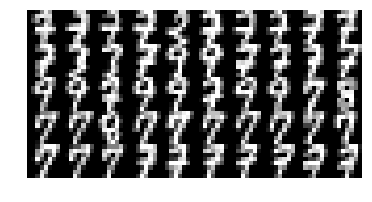

The cluster shown above is:  0


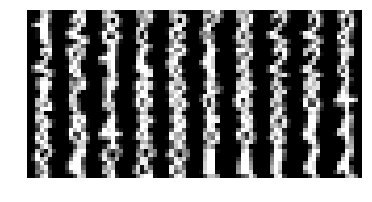

The cluster shown above is:  1


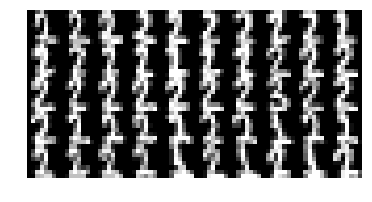

The cluster shown above is:  2


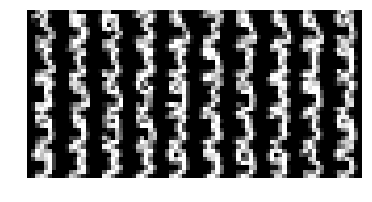

The cluster shown above is:  3


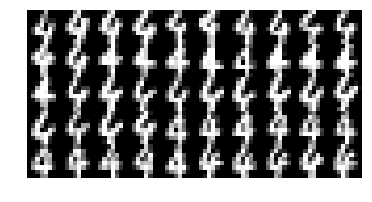

The cluster shown above is:  4


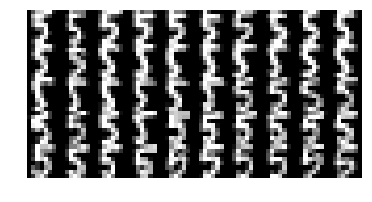

The cluster shown above is:  5


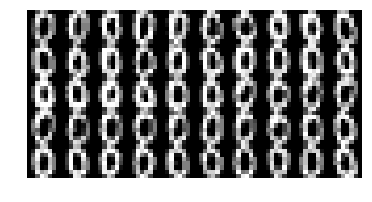

The cluster shown above is:  6


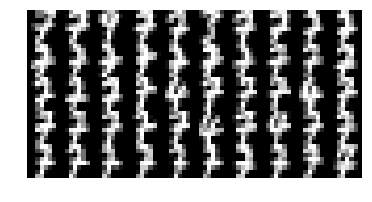

The cluster shown above is:  7


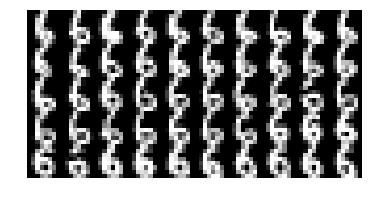

The cluster shown above is:  8


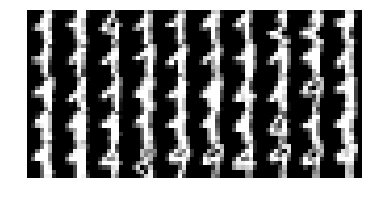

The cluster shown above is:  9
10 Centroids of my clusters: 


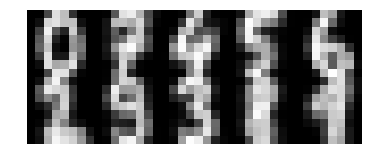

In [7]:
#The main loop implementig the k-means algortihm
from sklearn.datasets import load_digits

#load data
digits = load_digits(n_class=10)
x = reshape(digits.images,(1797,64))
#x_test = reshape(digits.images[1500:],(297,64))

#get amount of examples and features
n = x.shape[0]
f = x.shape[1]

#The amount of initializations (use high number to avoid local optima) and iterations 
initialisation_iterations = 10
iterations = 50

#define the amount of clusters k
k = 10

#The code below constists of three layers of loops:
#The first loop is for different initialisations of mu
#The second loop is for the amount of iterations of the k means algorithm
#The third layer actually consists of two loops:
    #Loop 1 updates the centroid of all the clusters
    #Loop 2 assigns a new cluster to each datapoint

    
#initialize best_cost to 'inf' so no other number can be higher
best_cost = float("inf")

for h in range(initialisation_iterations):
    #mu is the centroid matrix, initialized by sampling from a uniform distribution (shape is f=64 by k=10!)
    mu = random.uniform(0,16,(f,k))
    
    #c is the vector that assigns each digit to a centroid
    #initialized with integers between 0 and k=10, the shape is n=1797 by nothing
    c = random.randint(0,k,(n))
    cost = 0
    for j in range(iterations):
        #update the centroid of all the clusters
        for i in range(k):
            X_c = x[where(c==i)]
            mu = update_centroid(i,mu,X_c)
        #assign a new cluster to each datapoint and update cost
        for i in range(x.shape[0]):
            c[i] = compute_centroid(x[i,:],mu)
            cost += cost_function(x[i,:],mu)
    #only update if there is improvement
    if cost < best_cost:
        best_mu = mu
        best_cost = cost
        best_c = c


# Visualize
visualize(best_c)


print("10 Centroids of my clusters: ")
visualize_centroids(best_mu)

## Bonus

There is a special "trick" you can do to make sure all clusters are used. You can do this by initializing the cluster centroids as the first ten digits. Luckily, the dataset x has as first 10 elements the first 10 digits.

Take the code with the three loops, remove the outer loop since you already know the "best" initialization and use the below line of code to initialize mu.

To show:
- Visualize the resulting centroids (Do they still resemble the digits?)
- Plot the cost over iterations and compare this to the original initialization



In [53]:
#You should initialize mu as:
mu = x[:10,:].T